In [1]:
'''
Standard things to import...
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
'''
Lets import some other new things!
'''
import matplotlib # going to use this to change some settings (next cell)

from matplotlib.colors import LogNorm # this lets us scale color outputs using Log instead of Linear

import matplotlib.cm as cm # this gives access to the standard colormaps (besides rainbow)

In [3]:
'''
this is how you change the default properties of plot text
search Goolge for more examples of changing rcParams to get other fonts, styles, etc
'''
matplotlib.rcParams.update({'font.size':18}) 
matplotlib.rcParams.update({'font.family':'serif'})

In [5]:
# remember how to open FITS tables from last week (or go back and review)
dfile = 'data/I239_hip_main_small.fit'

# our data comes from the HIPPARCOS mission: http://adsabs.harvard.edu/abs/1997ESASP1200.....E
# I used Vizier to make a smaller version of the table for ease of reading

hdulist2 = fits.open(dfile)
hdulist2.info() # print the extensions

Filename: data/I239_hip_main_small.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      57   ()              
1    I_239_hip_main  BinTableHDU     62   118218R x 10C   [J, E, D, D, E, E, E, E, E, E]   


In [6]:
tbl = hdulist2[1].data # get the data from the 2nd extension
hdulist2.close() # close the file
tbl.columns # print the columns available (can be called by name!)

ColDefs(
    name = 'HIP'; format = 'J'; disp = 'I6'
    name = 'Vmag'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'RA_ICRS_'; format = 'D'; unit = 'deg'; disp = 'F12.8'
    name = 'DE_ICRS_'; format = 'D'; unit = 'deg'; disp = 'F12.8'
    name = 'Plx'; format = 'E'; unit = 'mas'; disp = 'F7.2'
    name = 'e_Plx'; format = 'E'; unit = 'mas'; disp = 'F6.2'
    name = 'B-V'; format = 'E'; unit = 'mag'; disp = 'F6.3'
    name = 'e_B-V'; format = 'E'; unit = 'mag'; disp = 'F6.3'
    name = 'V-I'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'e_V-I'; format = 'E'; unit = 'mag'; disp = 'F5.2'
)

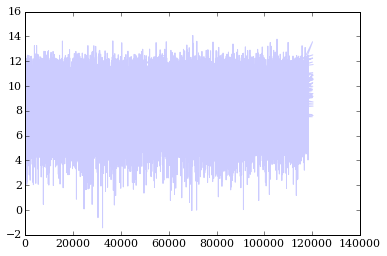

In [8]:
# you can make plots by calling columns by name!
plt.plot(tbl['HIP'], tbl['Vmag'], alpha=0.2)

You'll need to compute the absolute magnitude of the stars. Recall the formula:

$M_v = -5 \log(1/\pi) + 5 + m_V$

Where $\pi$ is the parallax in arcseconds, $m_V$ is the apparent magnitude in the V-band

In [36]:
'''
Find stars with "good" data
I required errors for B-V greater than 0 and less than or equal to 0.05mag
I required errors on parallax to be greater than 0 and less than or equal to 5

Finally, I required the absolute magnitudes to be real numbers (no Nulls, NaN's, Infs, etc)
'''

Mv = -5*(np.log10(1000/tbl['Plx']))+5+tbl['Vmag']

# here is most of what you need. Finish it!
ok = np.where((tbl['e_B-V'] <= 0.05) &
              (tbl['e_Plx'] > 0) & 
              np.isfinite(Mv))

/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in less_equal
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


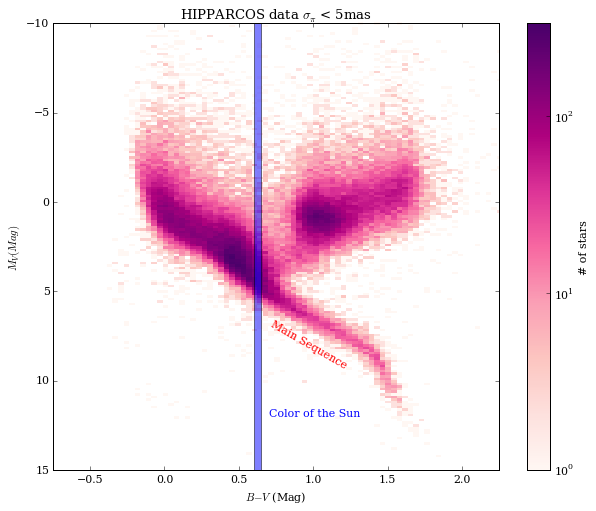

In [70]:
plt.figure( figsize=(10,8) ) 
# here's a freebie: I used a 10x8 figsize

plt.hist2d(tbl['B-V'][ok], Mv[ok], 
           bins=(100,200), # set the number of bins in the X and Y direction. You'll have to guess what I used
           norm=LogNorm(), # scale the colors using log, not linear (default)
           cmap = cm.RdPu) # change the colormap

# the B-V color of the Sun is 0.635 mag

# use plt.annotate to put words on the plot, set their colors, fontsizes, and rotation
plt.xlabel('$B-V$ (Mag)')
plt.ylabel('$M_{V} (Mag)$') # you can put (some) LaTeX math in matplotlib titles/labels

plt.title('HIPPARCOS data $\sigma_{\pi}$ < 5mas')
plt.xlim(-0.75,2.25)
plt.ylim(15,-10)

plt.annotate("Main Sequence", xy=(0.7,7), color = 'r', rotation = 330)
plt.annotate("Color of the Sun", xy=(0.7,12), color = 'b')
plt.axvspan(0.6, 0.65, facecolor='b', alpha=0.5)

cb = plt.colorbar(label='# of stars') # make a colorbar magically appear


# more freebies: this is the exact resolution and padding I used to make the figure file
plt.savefig('HIPP_HR.png', 
            dpi=300, # set the resolution
            bbox_inches='tight', # make the figure fill the window size
            pad_inches=0.5) # give a buffer so text doesnt spill off side of plot